# Lead Scoring Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


### Importing Libraries and dataset

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
data0 = pd.read_csv('Leads.csv')

In [4]:
data0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Inspecting the data
data0.shape

(9240, 37)

In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### The leads dataset has 9240 rows and 37 columns and consists of mix datatypes like object float and int.

In [7]:
# Missing value check
data0.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Replacing 'Select' with null as it is due to the user not selecting an option and hence can be replaced by null.
data0 = data0.replace('Select', np.nan)

In [9]:
pd.set_option('display.max_columns', None)
data0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Handling Missing Values

In [10]:
# calculating missing values percentage
round(100*(data0.isnull().sum()/len(data0)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Dropping columns with more the 40% missing values
data0 = data0.drop(columns = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [12]:
round(100*(data0.isnull().sum()/len(data0)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

##### Analyzing columns with high null values

In [13]:
# Analyzing the 'Country' column
round(100*(data0.Country.value_counts(normalize = True)))

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

In [14]:
# Replacing missing values with mode of the column i.e., 'India'
data0.Country = data0.Country.replace(np.nan, 'India')

In [15]:
#Analyzing the 'Specialization' column
round(100*(data0.Specialization.value_counts(normalize = True)))

Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

In [16]:
# Replacing the missing values with new category 'Others'
data0.Specialization = data0.Specialization.replace(np.nan, 'Others')

In [17]:
# Analyzing 'What is your current occupation' column
round(100*(data0['What is your current occupation'].value_counts(normalize = True)))

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [18]:
# Replacing null values with mode of the column i.e., 'Unemployed'
data0['What is your current occupation'] = data0['What is your current occupation'].replace(np.nan, 'Unemployed')

In [19]:
# Analyzing 'What matters most to you in choosing a course' column
round(100*(data0['What matters most to you in choosing a course'].value_counts(normalize = True)))

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [20]:
# The values are highly skewed and the columns is less relevant to the outcome we need so dropping the column
data0 = data0.drop(['What matters most to you in choosing a course'], axis = 1)

In [21]:
# Analyzing the 'Tags' column
round(100*(data0.Tags.value_counts(normalize = True)))

Will revert after reading the email                  35.0
Ringing                                              20.0
Interested in other courses                           9.0
Already a student                                     8.0
Closed by Horizzon                                    6.0
switched off                                          4.0
Busy                                                  3.0
Lost to EINS                                          3.0
Not doing further education                           2.0
Interested  in full time MBA                          2.0
Graduation in progress                                2.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            1.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to Others

In [22]:
# Replacing the null values by mode of the column i.e., 'Will revert after reading the email'
data0['Tags'] = data0['Tags'].replace(np.nan, 'Will revert after reading the email')

In [23]:
# Analyzing the City columns
round(100*(data0.City.value_counts(normalize = True)),2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

In [24]:
# Replacing the null values with mode of the column i.e., 'Mumbai'
data0.City = data0.City.replace(np.nan, 'Mumbai')

In [25]:
round(100*(data0.isnull().sum()/len(data0)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [26]:
# Dropping the missing value rows as the missing percentage is less than 1.5%
data0.dropna(inplace = True)

In [27]:
round(100*(data0.isnull().sum()/len(data0)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [28]:
data0.shape

(9074, 29)

##### Now we have zero missing values in the dataset and we are left with 9074 rows and 29 columns.

In [29]:
# Checking for duplicate values
data0[data0.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


##### There are no duplicate values in the data

### Univariate & Bivariate Analysis

In [30]:
data0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


<Axes: ylabel='Converted'>

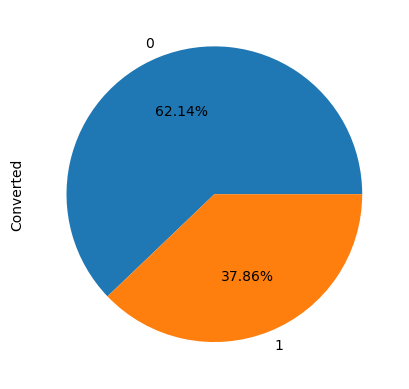

In [31]:
# Analyzing the target variable 'Converted'
data0.Converted.value_counts().plot.pie(autopct = '%.02f%%')

#### 37.86% leads have been converted i.e., the current lead conversion rate.

In [32]:
data0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [33]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

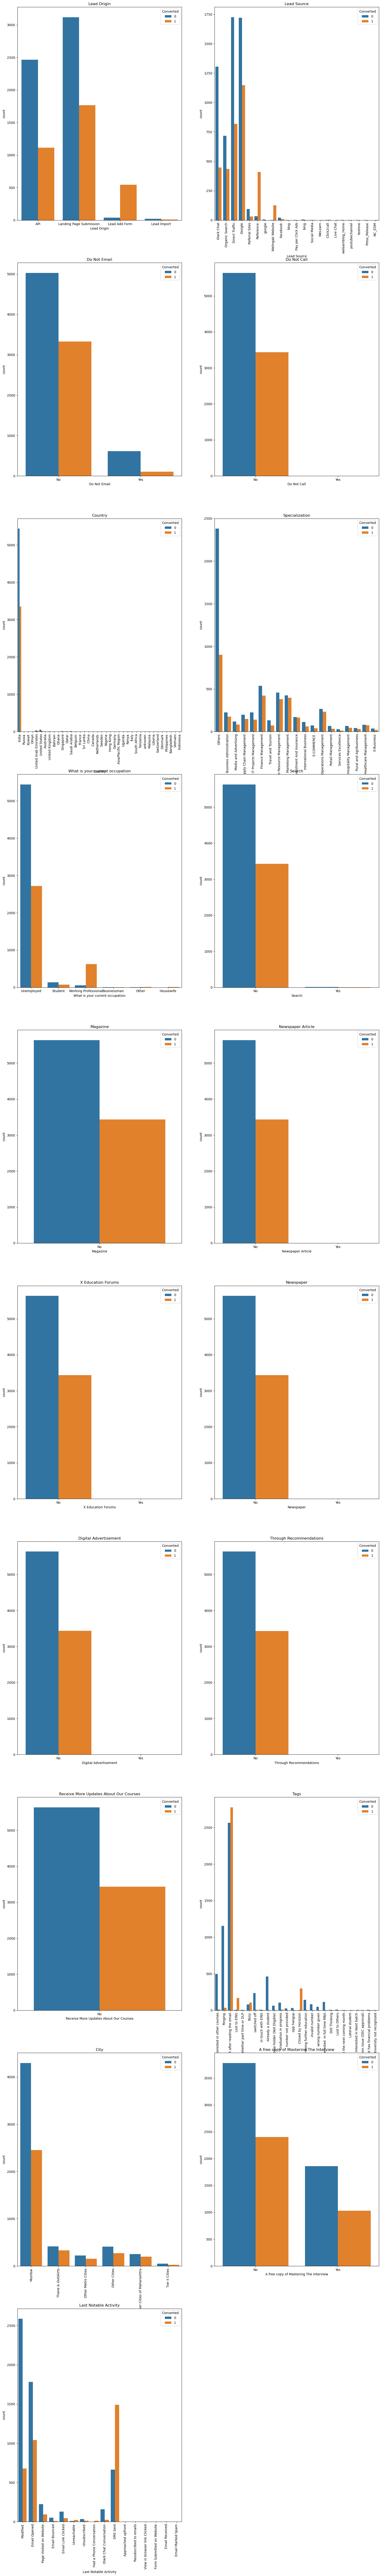

In [34]:
# Analyzing the categorical variables wrt to target variable 'Converted'.
plt.figure(figsize = (20,140))

plt.subplot(10,2,1)
sns.countplot(x = 'Lead Origin', hue = "Converted", data = data0)
plt.title('Lead Origin')

plt.subplot(10,2,2)
sns.countplot(x = 'Lead Source', hue = "Converted", data = data0).tick_params(axis = 'x', rotation = 90)
plt.title('Lead Source')

plt.subplot(10,2,3)
sns.countplot(x = 'Do Not Email', hue = "Converted", data = data0)
plt.title('Do Not Email')

plt.subplot(10,2,4)
sns.countplot(x = 'Do Not Call', hue = "Converted", data = data0)
plt.title('Do Not Call')

plt.subplot(10,2,5)
sns.countplot(x = 'Country', hue = "Converted", data = data0).tick_params(axis = 'x', rotation = 90)
plt.title('Country')

plt.subplot(10,2,6)
sns.countplot(x = 'Specialization', hue = "Converted", data = data0).tick_params(axis = 'x', rotation = 90)
plt.title('Specialization')

plt.subplot(10,2,7)
sns.countplot(x = 'What is your current occupation', hue = "Converted", data = data0)
plt.title('What is your current occupation')

plt.subplot(10,2,8)
sns.countplot(x = 'Search', hue = "Converted", data = data0)
plt.title('Search')

plt.subplot(10,2,9)
sns.countplot(x = 'Magazine', hue = "Converted", data = data0)
plt.title('Magazine')

plt.subplot(10,2,10)
sns.countplot(x = 'Newspaper Article', hue = "Converted", data = data0)
plt.title('Newspaper Article')

plt.subplot(10,2,11)
sns.countplot(x = 'X Education Forums', hue = "Converted", data = data0)
plt.title('X Education Forums')

plt.subplot(10,2,12)
sns.countplot(x = 'Newspaper', hue = "Converted", data = data0)
plt.title('Newspaper')

plt.subplot(10,2,13)
sns.countplot(x = 'Digital Advertisement', hue = "Converted", data = data0)
plt.title('Digital Advertisement')

plt.subplot(10,2,14)
sns.countplot(x = 'Through Recommendations', hue = "Converted", data = data0)
plt.title('Through Recommendations')

plt.subplot(10,2,15)
sns.countplot(x = 'Receive More Updates About Our Courses', hue = "Converted", data = data0)
plt.title('Receive More Updates About Our Courses')

plt.subplot(10,2,16)
sns.countplot(x = 'Tags', hue = "Converted", data = data0).tick_params(axis = 'x', rotation = 90)
plt.title('Tags')

plt.subplot(10,2,17)
sns.countplot(x = 'City', hue = "Converted", data = data0).tick_params(axis = 'x', rotation = 90)
plt.title('City')

plt.subplot(10,2,18)
sns.countplot(x = 'A free copy of Mastering The Interview', hue = "Converted", data = data0)
plt.title('A free copy of Mastering The Interview')

plt.subplot(10,2,19)
sns.countplot(x = 'Last Notable Activity', hue = "Converted", data = data0).tick_params(axis = 'x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

#### Insights
- The conversion from Lead add form is more with respect to others.
- Most leads are unemployed but maximum conversions are done from working professionals.
- Maximum number of leads are generated from google and direct traffic whereas the maximum conversion is through reference and welingak website.
- Most leads are from Mumbai, India.
- Leads with SMS Sent as last activity have high conversion rates. 

#### According to the above analysis we have many variables which are irrelevant and hence, can be removed.

In [35]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [36]:
data0 = data0.drop(['Lead Number', 'Tags', 'Country', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], axis = 1)

In [37]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

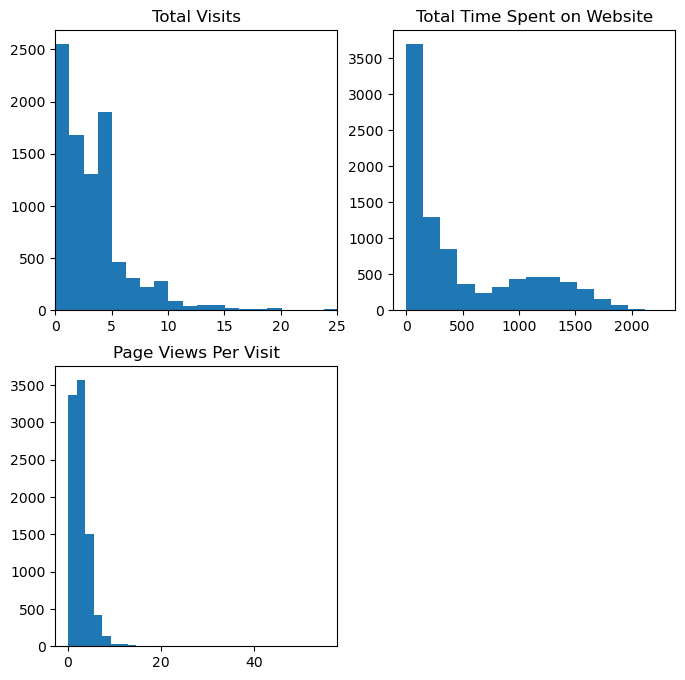

In [38]:
# Analyzing the numerical variable
plt.figure(figsize = (8, 8))

plt.subplot(2,2,1)
plt.hist(data0['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(data0['Total Time Spent on Website'], bins = 15)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(data0['Page Views Per Visit'], bins = 30)
plt.title('Page Views Per Visit')

plt.show()

<Axes: >

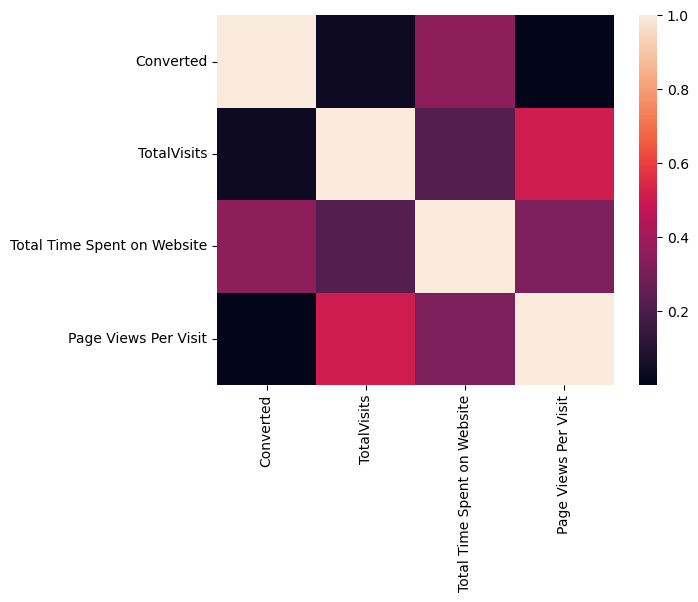

In [39]:
# Analyzing the numerical variables wrt target variable 'Converted'
sns.heatmap(data0.corr())

####
- When Total time spent on website is more, lead conversion is also more. 
- The correlation of the other numeric variables is very less wrt to target variable.

### Outlier Analysis

In [40]:
numvar = data0[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
numvar.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


####
- There are no such major outliers that seem to be impractical.

In [41]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [42]:
#Converting Yes/No columns to 1/0
data0['Do Not Email'] = data0['Do Not Email'].map({'Yes': 1, "No": 0})

In [43]:
data0['Do Not Call'] = data0['Do Not Call'].map({'Yes': 1, "No": 0})

In [44]:
data0.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


### Creating Dummy Variables

In [45]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [46]:
# Creating dummies
dummy = pd.get_dummies(data0[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity']], drop_first = True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
# Merging the dummies to main dataset
leads_data = pd.concat([data0, dummy], axis = 1)

In [48]:
# Dropping original columns
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity'], axis = 1)
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [49]:
leads_data.shape

(9074, 89)

#### Splitting data to train and test set

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = leads_data.drop(['Converted', 'Prospect ID'], axis = 1)

In [52]:
y = leads_data['Converted']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size =  0.3, random_state = 10)

#### Feature Scaling

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 87 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Do Not Call                                           9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Direct Traffic                            9074

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
#Scaling the numeric variables
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0,0,0.014184,0.612676,0.083333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3604,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5584,1,0,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7679,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7563,1,0,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Feature Selection

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 66),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 67),
 ('Lead Source_Press_Release', False, 36),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_blog', False, 25),
 ('Lead Source_google', False, 26),
 ('Lead Source_testone', False

In [60]:
# Storing all columns selected by rfe in col var
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [61]:
#### Assessing the model with StatsModels
import statsmodels.api as sm

# Building 1st model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.4
Date:                Tue, 16 Jan 2024   Deviance:                       5246.9
Time:                        14:35:28   Pearson chi2:                 6.76e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3985
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2738      0.161      1.701      0.089      -0.042       0.589
Do Not Email                                            -1.3912      0.205     -6.794      0.000      -1.793      -0.990
TotalVisits                                              8.1186      1.932      4.202      0.000       4.332      11.906
Total Time Spent on Website                              4.5564      0.167     27.264      0.000       4.229       4.884
Page Views Per Visit                                    -2.1054      0.592     -3.559      0.000      -3.265      -0.946
Lead Origin_Landing Page Submission                     -1.0795      0.129     -8.347      0.000      -1.333      -0.826
Lead Origin_Lead Add Form                                3.3165      0.245     13.537      0.000       2.836       3.797
Lead Source_Olark Chat                                   1.1090      0.133      8.344      0.000       0.848       1.369
Lead Source_Welingak Website                             3.2588      1.039      3.138      0.002       1.223       5.294
Last Activity_Email Bounced                             -1.0365      0.404     -2.566      0.010      -1.828      -0.245
Last Activity_Had a Phone Conversation                   0.8779      0.851      1.031      0.303      -0.791       2.547
Last Activity_Olark Chat Conversation                   -1.2598      0.198     -6.377      0.000      -1.647      -0.873
Specialization_Others                                   -1.1313      0.125     -9.019      0.000      -1.377      -0.885
What is your current occupation_Housewife               24.1978   2.96e+04      0.001      0.999    -5.8e+04    5.81e+04
What is your current occupation_Working Professional     2.6751      0.199     13.418      0.000       2.284       3.066
Last Notable Activity_Email Link Clicked                -2.0097      0.274     -7.334      0.000      -2.547      -1.473
Last Notable Activity_Email Opened                      -1.3844      0.088    -15.763      0.000      -1.557      -1.212
Last Notable Activity_Had a Phone Conversation          21.8122   2.05e+04      0.001      0.999   -4.03e+04    4.03e+04
Last Notable Activity_Modified                          -1.8129      0.098    -18.548      0.000      -2.004      -1.621
Last Notable Activity_Olark Chat Conversation           -1.7594      0.400     -4.394      0.000      -2.544      -0.975
Last Notable Activity_Page Visited on Website           -1.9759      0.211     -9.377      0.000      -2.389      -1.563
========================================================================================================================
"""

In [62]:
# Dropping column 'What is your current occupation_Housewife' as it has high p-value
col1 = col.drop('What is your current occupation_Housewife')

In [63]:
# Building 2nd model
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.4
Date:                Tue, 16 Jan 2024   Deviance:                       5256.7
Time:                        14:35:28   Pearson chi2:                 6.76e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3976
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2795      0.161      1.738      0.082      -0.036       0.595
Do Not Email                                            -1.3919      0.205     -6.800      0.000      -1.793      -0.991
TotalVisits                                              8.0759      1.930      4.183      0.000       4.292      11.860
Total Time Spent on Website                              4.5510      0.167     27.258      0.000       4.224       4.878
Page Views Per Visit                                    -2.1279      0.591     -3.598      0.000      -3.287      -0.969
Lead Origin_Landing Page Submission                     -1.0771      0.129     -8.338      0.000      -1.330      -0.824
Lead Origin_Lead Add Form                                3.3157      0.245     13.544      0.000       2.836       3.796
Lead Source_Olark Chat                                   1.1036      0.133      8.310      0.000       0.843       1.364
Lead Source_Welingak Website                             3.2543      1.039      3.133      0.002       1.219       5.290
Last Activity_Email Bounced                             -1.0388      0.404     -2.573      0.010      -1.830      -0.247
Last Activity_Had a Phone Conversation                   0.8752      0.851      1.028      0.304      -0.793       2.543
Last Activity_Olark Chat Conversation                   -1.2614      0.197     -6.387      0.000      -1.648      -0.874
Specialization_Others                                   -1.1351      0.125     -9.056      0.000      -1.381      -0.889
What is your current occupation_Working Professional     2.6700      0.199     13.397      0.000       2.279       3.061
Last Notable Activity_Email Link Clicked                -2.0091      0.274     -7.331      0.000      -2.546      -1.472
Last Notable Activity_Email Opened                      -1.3790      0.088    -15.715      0.000      -1.551      -1.207
Last Notable Activity_Had a Phone Conversation          20.8137   1.25e+04      0.002      0.999   -2.44e+04    2.44e+04
Last Notable Activity_Modified                          -1.8085      0.098    -18.522      0.000      -2.000      -1.617
Last Notable Activity_Olark Chat Conversation           -1.7544      0.400     -4.383      0.000      -2.539      -0.970
Last Notable Activity_Page Visited on Website           -1.9749      0.211     -9.375      0.000      -2.388      -1.562
========================================================================================================================
"""

In [64]:
# Dropping column 'Last Notable Activity_Had a Phone Conversation' as it has high p-value
col2 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [65]:
# Building 3rd model
X_train_sm = sm.add_constant(X_train[col2])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.8
Date:                Tue, 16 Jan 2024   Deviance:                       5259.6
Time:                        14:35:29   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2835      0.161      1.763      0.078      -0.032       0.599
Do Not Email                                            -1.3961      0.205     -6.824      0.000      -1.797      -0.995
TotalVisits                                              8.0767      1.927      4.191      0.000       4.299      11.854
Total Time Spent on Website                              4.5458      0.167     27.237      0.000       4.219       4.873
Page Views Per Visit                                    -2.1199      0.591     -3.588      0.000      -3.278      -0.962
Lead Origin_Landing Page Submission                     -1.0757      0.129     -8.327      0.000      -1.329      -0.823
Lead Origin_Lead Add Form                                3.3162      0.245     13.541      0.000       2.836       3.796
Lead Source_Olark Chat                                   1.1049      0.133      8.317      0.000       0.845       1.365
Lead Source_Welingak Website                             3.2574      1.039      3.136      0.002       1.222       5.293
Last Activity_Email Bounced                             -1.0341      0.404     -2.561      0.010      -1.826      -0.243
Last Activity_Had a Phone Conversation                   1.5778      0.708      2.229      0.026       0.190       2.965
Last Activity_Olark Chat Conversation                   -1.2560      0.197     -6.360      0.000      -1.643      -0.869
Specialization_Others                                   -1.1371      0.125     -9.070      0.000      -1.383      -0.891
What is your current occupation_Working Professional     2.6691      0.199     13.389      0.000       2.278       3.060
Last Notable Activity_Email Link Clicked                -2.0130      0.274     -7.346      0.000      -2.550      -1.476
Last Notable Activity_Email Opened                      -1.3830      0.088    -15.768      0.000      -1.555      -1.211
Last Notable Activity_Modified                          -1.8168      0.098    -18.633      0.000      -2.008      -1.626
Last Notable Activity_Olark Chat Conversation           -1.7625      0.400     -4.404      0.000      -2.547      -0.978
Last Notable Activity_Page Visited on Website           -1.9784      0.211     -9.396      0.000      -2.391      -1.566
========================================================================================================================
"""

Now all the p-values are less than 0.05 

#### Checking VIFs

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain all the names of feature variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.62
4,Lead Origin_Landing Page Submission,3.95
1,TotalVisits,3.20
11,Specialization_Others,2.76
15,Last Notable Activity_Modified,2.46
6,Lead Source_Olark Chat,2.12
2,Total Time Spent on Website,2.07
14,Last Notable Activity_Email Opened,2.02
10,Last Activity_Olark Chat Conversation,1.97
0,Do Not Email,1.88


All the VIFs are below 5 hence, we can say model 3 as our final model

### Feature Importance

In [67]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.40
TotalVisits                                             8.08
Total Time Spent on Website                             4.55
Page Views Per Visit                                   -2.12
Lead Origin_Landing Page Submission                    -1.08
Lead Origin_Lead Add Form                               3.32
Lead Source_Olark Chat                                  1.10
Lead Source_Welingak Website                            3.26
Last Activity_Email Bounced                            -1.03
Last Activity_Had a Phone Conversation                  1.58
Last Activity_Olark Chat Conversation                  -1.26
Specialization_Others                                  -1.14
What is your current occupation_Working Professional    2.67
Last Notable Activity_Email Link Clicked               -2.01
Last Notable Activity_Email Opened                     -1.38
Last Notable Activity_Modified                         -1.82
Last Notable Activity_Ol

In [68]:
new_params = pd.to_numeric(new_params, errors='coerce')
feature_importance = 100.0 * (new_params / new_params.max())
feature_importance

Do Not Email                                           -17.29
TotalVisits                                            100.00
Total Time Spent on Website                             56.28
Page Views Per Visit                                   -26.25
Lead Origin_Landing Page Submission                    -13.32
Lead Origin_Lead Add Form                               41.06
Lead Source_Olark Chat                                  13.68
Lead Source_Welingak Website                            40.33
Last Activity_Email Bounced                            -12.80
Last Activity_Had a Phone Conversation                  19.54
Last Activity_Olark Chat Conversation                  -15.55
Specialization_Others                                  -14.08
What is your current occupation_Working Professional    33.05
Last Notable Activity_Email Link Clicked               -24.92
Last Notable Activity_Email Opened                     -17.12
Last Notable Activity_Modified                         -22.49
Last Not

In [69]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             3
TotalVisits                                             13
Total Time Spent on Website                             17
Page Views Per Visit                                    15
Lead Origin_Landing Page Submission                     16
Lead Origin_Lead Add Form                                0
Lead Source_Olark Chat                                  14
Lead Source_Welingak Website                            10
Last Activity_Email Bounced                             11
Last Activity_Had a Phone Conversation                   4
Last Activity_Olark Chat Conversation                    8
Specialization_Others                                    6
What is your current occupation_Working Professional     9
Last Notable Activity_Email Link Clicked                12
Last Notable Activity_Email Opened                       7
Last Notable Activity_Modified                           5
Last Notable Activity_Olark Chat Conversation           

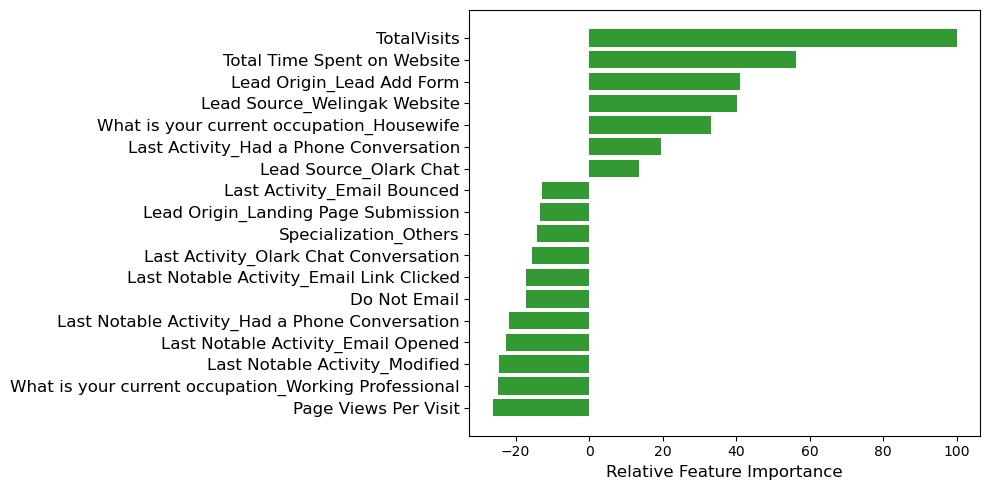

In [70]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,5))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align = 'center', color = 'green', alpha = 0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize = 12)
featax.set_xlabel('Relative Feature Importance', fontsize = 12)

plt.tight_layout()
plt.show()


### Key Findings

- The most important feature appears to be `TotalVisits`, with the highest relative importance value, which suggests that the number of visits has the strongest relationship with the target variable in the model.
- The second most important feature is `Total Time Spent on Website`, implying that the time a lead spends on the website is also a strong predictor.
- `Lead Origin_Lead Add Form` and `Lead Source_Welingak Website` are also relatively important features, indicating that the origin of the lead and the source of the lead are significant factors.
- Several features have negative importance values, such as `Do Not Email`, `Page Views Per Visit`, and `Last Notable Activity_Page Visited on Website`. Negative values can indicate that the presence or increase of these features negatively impacts the target variable or the likelihood of an event occurring i.e., inversely proportional.
- `What is your current occupation_Working Professional` has a positive feature importance, suggesting that this occupation category positively influences the target variable.

The chart provides insight into which features may be most predictive in a model and which ones may negatively influence the outcome. This information can be used to improve model performance by focusing on the most relevant features.

### Creating Predictions

In [71]:
# Aquiring the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289   0.63
3604   0.15
5584   0.50
7679   0.15
7563   0.18
7978   0.93
7780   0.14
7863   0.99
838    0.70
708    0.26
dtype: float64

In [72]:
# Reshaping y_train_pred to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.63362594, 0.15096846, 0.50217332, 0.14658919, 0.1794801 ,
       0.92797254, 0.13792372, 0.98709343, 0.69951455, 0.25582587])

In [73]:
# Creating new dataframe with converted variable and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Probability': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Probability,Prospect ID
0,1,0.63,1289
1,0,0.15,3604
2,0,0.50,5584
3,0,0.15,7679
4,0,0.18,7563


#### Taking an arbitraty cutoff of 0.5 for probability to get the predicted label

In [74]:
y_train_pred_final['Predicted'] = y_train_pred_final.Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Probability,Prospect ID,Predicted
0,1,0.63,1289,1
1,0,0.15,3604,0
2,0,0.50,5584,1
3,0,0.15,7679,0
4,0,0.18,7563,0


### Model Evaluation

In [75]:
# Creating a confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3426,  469],
       [ 704, 1752]], dtype=int64)

In [76]:
# Calculating overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8153046764289088

In [77]:
# Defining basic parameters of confusion metrics
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [78]:
# Calculating Sensitivity
print('Sensitivity : ', TP / float(TP + FN))

Sensitivity :  0.7133550488599348


In [79]:
# Calculating Specificity
print('Specificity : ',TN / float(TN+FP))

Specificity :  0.8795892169448011


#### The specificity is good to be around 88% but the sensitivity is a bit low at 71% mainly because we have chosen ar arbitrary cutoff of 0.5. So now  we will get a better cutoff value from the help of ROC Curve.

In [80]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()
    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Probability, drop_intermediate = False )

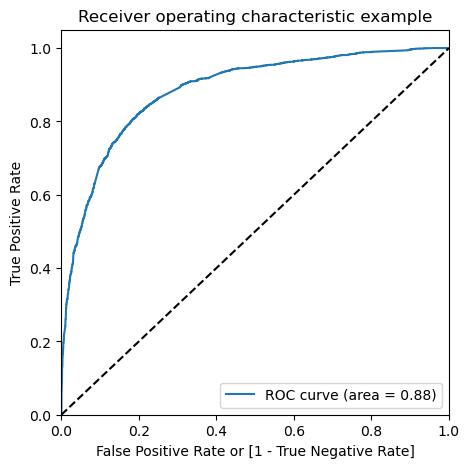

In [82]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Probability)

#### Since the ROC curve has more area(0.88) under it and it is closer to the top left corner, our model has turned out to be great

### Getting the optimal value of cutoff

In [83]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.63,1289,1,1,1,1,1,1,1,1,0,0,0
1,0,0.15,3604,0,1,1,0,0,0,0,0,0,0,0
2,0,0.50,5584,1,1,1,1,1,1,1,0,0,0,0
3,0,0.15,7679,0,1,1,0,0,0,0,0,0,0,0
4,0,0.18,7563,0,1,1,0,0,0,0,0,0,0,0


In [84]:
# Calculating accuracy, sensitivity & specificity of the probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    
    specificity = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00      0.39         1.00         0.00
0.10  0.10      0.59         0.97         0.36
0.20  0.20      0.76         0.91         0.66
0.30  0.30      0.80         0.84         0.77
0.40  0.40      0.82         0.78         0.83
0.50  0.50      0.82         0.71         0.88
0.60  0.60      0.80         0.60         0.92
0.70  0.70      0.78         0.52         0.95
0.80  0.80      0.76         0.43         0.97
0.90  0.90      0.72         0.29         0.99


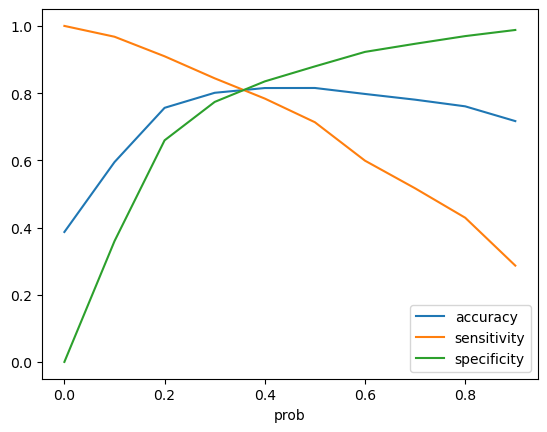

In [85]:
# Plotting the graph with above values
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'])
plt.show()

#### From the above graph we have an optimal cutoff value of 0.35

In [86]:
# Setting the cutoff to 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Probability.map(lambda x:1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.63,1289,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.15,3604,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.50,5584,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.15,7679,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.18,7563,0,1,1,0,0,0,0,0,0,0,0,0


#### Assigning a Lead Score 

In [87]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Probability.map(lambda x:round(x * 100))
y_train_pred_final.head()

,Converted,Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.63,1289,1,1,1,1,1,1,1,1,0,0,0,1,63
1,0,0.15,3604,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.50,5584,1,1,1,1,1,1,1,0,0,0,0,1,50
3,0,0.15,7679,0,1,1,0,0,0,0,0,0,0,0,0,15
4,0,0.18,7563,0,1,1,0,0,0,0,0,0,0,0,0,18


#### Evaluating the model again

In [88]:
# Calculating Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8094788222327193

In [89]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3138,  757],
       [ 453, 2003]], dtype=int64)

In [90]:
# Defining basic parameters of confusion metrics
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [91]:
# Calculating Sensitivity
TP / float(TP + FN)

0.8155537459283387

In [92]:
# Calculating Specificity
TN / float(TN + FP)

0.8056482670089858

#### Precision & Recall

In [93]:
# Building the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3426,  469],
       [ 704, 1752]], dtype=int64)

In [94]:
# Calculating Precision 
confusion[1,1] / (confusion[0,1] + confusion[1,1])

0.7888338586222422

In [95]:
# Calculating Recall
confusion[1,1] / (confusion[1,0] + confusion[1,1])

0.7133550488599348

With the updated cutoff of 0.35, we have precision of around 79% and recall at 71%

#### Precision & Recall Tradeoff

In [96]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Probability)

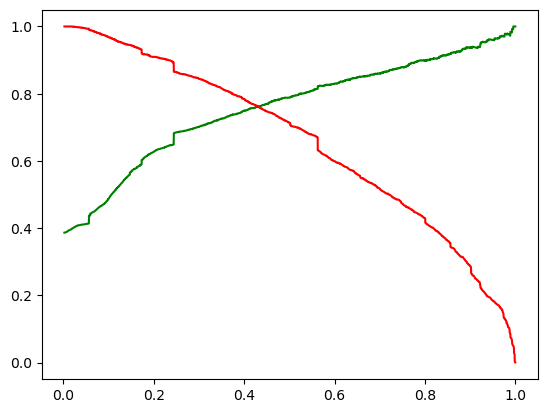

In [98]:
# plotting the trade-off curve 
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Prediction on Test Set

In [99]:
# Scaling the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [100]:
# Assigning the columns as per the final model 3 to the X_test 
X_test = X_test[col2]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8308,0,0.04,0.42,0.21,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7212,0,0.03,0.00,0.17,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2085,0,0.00,0.00,0.00,0,1,0,1,0,0,0,1,0,0,1,0,0,0
4048,0,0.03,0.62,0.08,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4790,0,0.03,0.01,0.08,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [101]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [102]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8308   0.30
7212   0.85
2085   0.99
4048   0.89
4790   0.11
8552   0.41
2232   0.14
5259   0.50
2399   0.23
8018   0.06
dtype: float64

In [103]:
# Converting y_test_pred to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
8308,0.30
7212,0.85
2085,0.99
4048,0.89
4790,0.11


In [104]:
# Converting y_test also to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
8308,0
7212,1
2085,1
4048,1
4790,0


In [105]:
# Adding Prospect ID to index of dataframe
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
8308,0,8308
7212,1,7212
2085,1,2085
4048,1,4048
4790,0,4790


In [106]:
# Removing the index from both the dataframes 
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [107]:
# Appending both test and predicting dataframe
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8308,0.30
1,1,7212,0.85
2,1,2085,0.99
3,1,4048,0.89
4,0,4790,0.11


In [108]:
# Renaming and & rearranging the columns
y_pred_final = y_pred_final.rename(columns = {0 : 'Probability'})
y_pred_final = y_pred_final.reindex(columns = ['Prospect ID', 'Converted', 'Probability'])
y_pred_final.head()

,Prospect ID,Converted,Probability
0,8308,0,0.30
1,7212,1,0.85
2,2085,1,0.99
3,4048,1,0.89
4,4790,0,0.11


In [109]:
# Adding the cutoff of 0.35 to the test model
y_pred_final['Final_Predicted'] = y_pred_final.Probability.map(lambda x : 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Probability,Final_Predicted
0,8308,0,0.30,0
1,7212,1,0.85,1
2,2085,1,0.99,1
3,4048,1,0.89,1
4,4790,0,0.11,0


In [110]:
# Calculating overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.808666911494675

In [111]:
# Creating the confusion matrix for test set
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion3

array([[1396,  348],
       [ 173,  806]], dtype=int64)

In [112]:
# Defining metrics
TP = confusion3[1,1]  
TN = confusion3[0,0] 
FP = confusion3[0,1] 
FN = confusion3[1,0] 

In [113]:
# Calculating sensitivity
TP / float(TP+FN)

0.8232890704800817

In [114]:
# Calculating Specificity
TN / float(TN+FP)

0.8004587155963303

### Assigning a Lead Score

In [115]:
y_pred_final['Lead_Score'] = y_pred_final.Probability.map(lambda x : round(x * 100))
y_pred_final.head()

,Prospect ID,Converted,Probability,Final_Predicted,Lead_Score
0,8308,0,0.30,0,30
1,7212,1,0.85,1,85
2,2085,1,0.99,1,99
3,4048,1,0.89,1,89
4,4790,0,0.11,0,11


### Insights & Conclusion

##
- We have assigned a Lead Score to the leads and hence using the scores hot leads can be determined.
#### Result:
Train set
- Accuracy   : 80.94%
- Sensitivity: 81.55%
- Specificity: 80.56%

Test set
- Accuracy   : 80.86%
- Sensitivity: 82.32%
- Specificity: 80.04%

#### Hence, we have achieved a lead conversion rate of 80%.
- The team should make phone calls if the lead has visited the website multiple times and also spend more time on it. To increase this the website should be built more intuitive and engaging. 
- Leads from source Welingak Website and having current occupation_Working Professional should be kept a preference.
- Company should make a cutoff of the lead score and contact only the leads above the cutoff score.
- To reduce calls, company can send automated emails and SMS system to keep the interaction live with the hot leads.	
